In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential

#Importing all the required layers

from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/digit_data/train.csv')
test = pd.read_csv('/content/drive/My Drive/digit_data/test.csv')


In [5]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

Each image in our data has 784 pixels

In [0]:
Y_train = train['label']
X_train = train.drop(['label'],axis=1)

In [0]:
del train

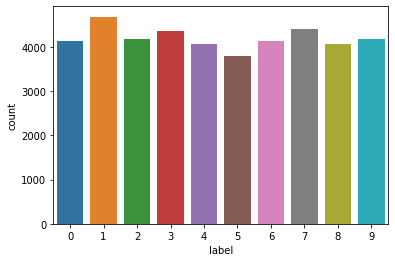

In [8]:
sns.countplot(Y_train)

In [9]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [10]:
X_train.isna().any().sum()

0

In [11]:
Y_train.isna().any().sum()

0

In [0]:
#Normalizing data as 0 to 255 is a long range 

In [0]:
X_train = X_train/255
test = test/255

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [0]:
# One hot encoding or Categorical Encoding

In [0]:
Y_train = to_categorical(Y_train,num_classes=10)

In [18]:
import sklearn
print(sklearn.__version__)

0.22.1


In [0]:
random_seed = 2


X_train,X_val,Y_train,Y_val  = train_test_split(X_train,Y_train,test_size=0.1,random_state=random_seed)

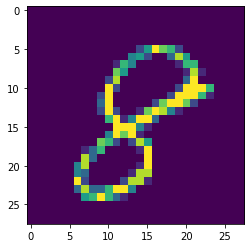

In [27]:
g = plt.imshow(X_train[0][:28,:28,0])

Building CNN

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [0]:
# Setting the optimizer,cost function and scoring metric

In [0]:
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon=1e-08, decay=0.0)

In [31]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [0]:
# To decrease learning rate with each epoch, we use learning_rate_reduction

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [0]:
epochs=30
batch_size=86

### Data Augmentation

Data Augmentation are techniques used to alter the data images. These are required to validate the images in which the digits are either larger than normal or not centered etc.

Data Augmentation techniques make the model more robust

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=0,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             )

In [0]:
datagen.fit(X_train)

In [39]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                              epochs = epochs,
                              validation_data=(X_val,Y_val),
                              verbose=2,
                              steps_per_epoch=X_train.shape[0]//batch_size,
                              callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30





 - 261s - loss: 0.4885 - acc: 0.8452 - val_loss: 0.1010 - val_acc: 0.9714
Epoch 2/30
 - 260s - loss: 0.1922 - acc: 0.9442 - val_loss: 0.0630 - val_acc: 0.9817
Epoch 3/30
 - 259s - loss: 0.1592 - acc: 0.9559 - val_loss: 0.0594 - val_acc: 0.9814
Epoch 4/30
 - 259s - loss: 0.1391 - acc: 0.9630 - val_loss: 0.0527 - val_acc: 0.9867
Epoch 5/30
 - 260s - loss: 0.1341 - acc: 0.9653 - val_loss: 0.0399 - val_acc: 0.9895
Epoch 6/30
 - 259s - loss: 0.1265 - acc: 0.9664 - val_loss: 0.0488 - val_acc: 0.9867
Epoch 7/30
 - 260s - loss: 0.1201 - acc: 0.9698 - val_loss: 0.0369 - val_acc: 0.9886
Epoch 8/30
 - 259s - loss: 0.1201 - acc: 0.9695 - val_loss: 0.0407 - val_acc: 0.9874

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/30
 - 261s - loss: 0.0843 - acc: 0.9780 - val_loss: 0.0398 - val_acc: 0.9893
Epoch 10/30
 - 260s - loss: 0.0819 - acc: 0.9781 - v

In [0]:
from yellowbrick.classifier import ConfusionMatrix

In [0]:
results = model.predict(test)

results = np.argmax(results,axis=1)

results = pd.Series(results,name='Label')

In [45]:
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)

submission.to_csv("digitsub1.csv",index=False)

In [0]:
finalsub = pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)
finalsub.to_csv("digitsub2.csv",index=False)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

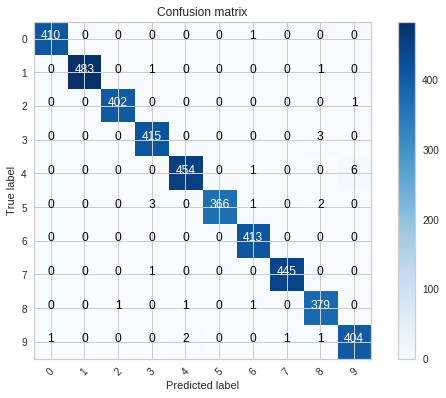

In [50]:


Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10)) 